# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [269]:
# Import essential libraries for data manipulation and analysfron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [270]:
# Importing the file porter_data_1.csv
delivery = pd.read_csv("porter_data_1.csv")
delivery.head()

market_id        created_at actual_delivery_time  store_primary_category  \
0          1  06-02-2015 22:24     06-02-2015 23:11                       4   
1          2  10-02-2015 21:49     10-02-2015 22:33                      46   
2          2  16-02-2015 00:11     16-02-2015 01:06                      36   
3          1  12-02-2015 03:36     12-02-2015 04:35                      38   
4          1  27-01-2015 02:12     27-01-2015 02:58                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance  
0                        21     34.44  
1                         2     27.60  
2                        18     11.56  
3                         8     31.80  
4                         7      8.20

In [106]:
delivery.describe()

market_id  store_primary_category  order_protocol    total_items  \
count  175777.000000           175777.000000   175777.000000  175777.000000   
mean        2.743726               35.887949        2.911752       3.204976   
std         1.330963               20.728254        1.513128       2.674055   
min         1.000000                0.000000        1.000000       1.000000   
25%         2.000000               18.000000        1.000000       2.000000   
50%         2.000000               38.000000        3.000000       3.000000   
75%         4.000000               55.000000        4.000000       4.000000   
max         6.000000               72.000000        7.000000     411.000000   

            subtotal  num_distinct_items  min_item_price  max_item_price  \
count  175777.000000       175777.000000   175777.000000   175777.000000   
mean     2697.111147            2.675060      684.965433     1160.158616   
std      1828.554893            1.625681      519.882924      560.828571   
min         0.000000            1.000000      -86.000000        0.000000   
25%      1412.000000            1.000000      299.000000      799.000000   
50%      2224.000000            2.000000      595.000000     1095.000000   
75%      3410.000000            3.000000      942.000000     1395.000000   
max     26800.000000           20.000000    14700.000000    14700.000000   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          175777.000000       175777.000000             175777.000000   
mean               44.918664           41.861381                 58.230115   
std                34.544724           32.168505                 52.731043   
min                -4.000000           -5.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                285.000000   

            distance  
count  175777.000000  
mean       21.843090  
std         8.748712  
min         0.000000  
25%        15.360000  
50%        21.760000  
75%        28.120000  
max        83.520000

In [157]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  int64  
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  int64  
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  int64  
 11  total_busy_dashers        175777 non-null  int64  
 12  total_outstanding_orders  175777 non-null  int64  
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [271]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

# file_name['pickup_date'] = file_name['tpep_pickup_datetime'].dt.date
# file_name['pickup_hour'] = file_name['tpep_pickup_datetime'].dt.hour

# delivery['created_at'] = pd.to_datetime(delivery['created_at'])
    
# delivery['created_date'] = delivery['created_at'].dt.date
# delivery['created_hour'] = delivery['created_at'].dt.hour
# Convert to datetime format
delivery['created_at'] = pd.to_datetime(delivery['created_at'], format='%d-%m-%Y %H:%M')

# Extract date and hour
delivery['created_date'] = delivery['created_at'].dt.date 
delivery['created_hour'] = delivery['created_at'].dt.hour  


In [272]:
delivery['actual_delivery_time'] = pd.to_datetime(delivery['actual_delivery_time'], format='%d-%m-%Y %H:%M')

# Extract date and hour
delivery['actual_delivery_date'] = delivery['actual_delivery_time'].dt.date  # Corrected: Added dot before `dt`
delivery['created_delivery_hour'] = delivery['actual_delivery_time'].dt.hour 

In [160]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 18 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  int64         
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  int64         
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  int64         
 11  total_busy_dashers        175777 non-null  int64         
 12  to

In [161]:
delivery.head()


market_id          created_at actual_delivery_time  store_primary_category  \
0          1 2015-02-06 22:24:00  2015-02-06 23:11:00                       4   
1          2 2015-02-10 21:49:00  2015-02-10 22:33:00                      46   
2          2 2015-02-16 00:11:00  2015-02-16 01:06:00                      36   
3          1 2015-02-12 03:36:00  2015-02-12 04:35:00                      38   
4          1 2015-01-27 02:12:00  2015-01-27 02:58:00                      38   

   order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0               1            4      3441                   4             557   
1               2            1      1900                   1            1400   
2               3            4      4771                   3             820   
3               1            1      1525                   1            1525   
4               1            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                     33                  14   
1            1400                      1                   2   
2            1604                      8                   6   
3            1525                      5                   6   
4            2195                      5                   5   

   total_outstanding_orders  distance created_date  created_hour  \
0                        21     34.44   2015-02-06            22   
1                         2     27.60   2015-02-10            21   
2                        18     11.56   2015-02-16             0   
3                         8     31.80   2015-02-12             3   
4                         7      8.20   2015-01-27             2   

  actual_delivery_date  created_delivery_hour  
0           2015-02-06                     23  
1           2015-02-10                     22  
2           2015-02-16                      1  
3           2015-02-12                      4  
4           2015-01-27                      2

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [273]:
# Convert categorical features to category type

# Sample DataFrame (assuming `delivery` is your DataFrame)
categorical_cols = ['store_primary_category', 'order_protocol', 'market_id']

# Convert to category dtype
for col in categorical_cols:
    delivery[col] = delivery[col].astype('category')

# Check the result
print(delivery.dtypes)


market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers                int64
total_busy_dashers                   int64
total_outstanding_orders             int64
distance                           float64
created_date                        object
created_hour                         int32
actual_delivery_date                object
created_delivery_hour                int32
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [274]:
# Calculate time taken in minutes
delivery['time_taken_minutes'] = (delivery['actual_delivery_time'] - delivery['created_at']).dt.total_seconds() / 60
print(delivery[['created_at', 'actual_delivery_time', 'time_taken_minutes']].head())


           created_at actual_delivery_time  time_taken_minutes
0 2015-02-06 22:24:00  2015-02-06 23:11:00                47.0
1 2015-02-10 21:49:00  2015-02-10 22:33:00                44.0
2 2015-02-16 00:11:00  2015-02-16 01:06:00                55.0
3 2015-02-12 03:36:00  2015-02-12 04:35:00                59.0
4 2015-01-27 02:12:00  2015-01-27 02:58:00                46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [275]:
# Extract the hour and day of week from the 'created_at' timestamp

delivery['day_of_week'] = delivery['created_at'].dt.day_name()

# Create a categorical feature 'isWeekend'

delivery['isWeekend'] = delivery['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
delivery.head()

market_id          created_at actual_delivery_time store_primary_category  \
0         1 2015-02-06 22:24:00  2015-02-06 23:11:00                      4   
1         2 2015-02-10 21:49:00  2015-02-10 22:33:00                     46   
2         2 2015-02-16 00:11:00  2015-02-16 01:06:00                     36   
3         1 2015-02-12 03:36:00  2015-02-12 04:35:00                     38   
4         1 2015-01-27 02:12:00  2015-01-27 02:58:00                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0              1            4      3441                   4             557   
1              2            1      1900                   1            1400   
2              3            4      4771                   3             820   
3              1            1      1525                   1            1525   
4              1            2      3620                   2            1425   

   max_item_price  ...  total_busy_dashers  total_outstanding_orders  \
0            1239  ...                  14                        21   
1            1400  ...                   2                         2   
2            1604  ...                   6                        18   
3            1525  ...                   6                         8   
4            2195  ...                   5                         7   

   distance  created_date created_hour  actual_delivery_date  \
0     34.44    2015-02-06           22            2015-02-06   
1     27.60    2015-02-10           21            2015-02-10   
2     11.56    2015-02-16            0            2015-02-16   
3     31.80    2015-02-12            3            2015-02-12   
4      8.20    2015-01-27            2            2015-01-27   

  created_delivery_hour  time_taken_minutes  day_of_week isWeekend  
0                    23                47.0       Friday         0  
1                    22                44.0      Tuesday         0  
2                     1                55.0       Monday         0  
3                     4                59.0     Thursday         0  
4                     2                46.0      Tuesday         0  

[5 rows x 21 columns]

In [276]:
# Drop unnecessary columns
# Drop unnecessary columns (if required)
columns_to_drop = ['actual_delivery_time']  # Add any other columns you want to remove
delivery.drop(columns=columns_to_drop, inplace=True)

# Display results
print(delivery[['created_at', 'created_hour', 'day_of_week', 'isWeekend']].head())

           created_at  created_hour day_of_week  isWeekend
0 2015-02-06 22:24:00            22      Friday          0
1 2015-02-10 21:49:00            21     Tuesday          0
2 2015-02-16 00:11:00             0      Monday          0
3 2015-02-12 03:36:00             3    Thursday          0
4 2015-01-27 02:12:00             2     Tuesday          0


In [15]:
delivery.head()

market_id          created_at store_primary_category order_protocol  \
0         1 2015-02-06 22:24:00                      4              1   
1         2 2015-02-10 21:49:00                     46              2   
2         2 2015-02-16 00:11:00                     36              3   
3         1 2015-02-12 03:36:00                     38              1   
4         1 2015-01-27 02:12:00                     38              1   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            4      4771                   3             820            1604   
3            1      1525                   1            1525            1525   
4            2      3620                   2            1425            2195   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                     33                  14                        21   
1                      1                   2                         2   
2                      8                   6                        18   
3                      5                   6                         8   
4                      5                   5                         7   

   distance created_date  created_hour actual_delivery_date  \
0     34.44   2015-02-06            22           2015-02-06   
1     27.60   2015-02-10            21           2015-02-10   
2     11.56   2015-02-16             0           2015-02-16   
3     31.80   2015-02-12             3           2015-02-12   
4      8.20   2015-01-27             2           2015-01-27   

   created_delivery_hour  time_taken_minutes day_of_week  isWeekend  
0                     23                47.0      Friday          0  
1                     22                44.0     Tuesday          0  
2                      1                55.0      Monday          0  
3                      4                59.0    Thursday          0  
4                      2                46.0     Tuesday          0

In [114]:
delivery.columns

Index(['market_id', 'created_at', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_date', 'created_hour',
       'actual_delivery_date', 'created_delivery_hour', 'time_taken_minutes',
       'day_of_week', 'isWeekend'],
      dtype='object')

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [277]:
# Define target variable (y) and features (X)
delivery.columns
y = delivery['time_taken_minutes']
X = delivery[['market_id', 'created_at', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'actual_delivery_date',
       'created_delivery_hour', 'created_date', 'created_hour',
        'day_of_week', 'isWeekend']]


In [278]:
# X= pd.get_dummies(X, columns=['day_of_week'], drop_first=True)
delivery.columns

Index(['market_id', 'created_at', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_date', 'created_hour',
       'actual_delivery_date', 'created_delivery_hour', 'time_taken_minutes',
       'day_of_week', 'isWeekend'],
      dtype='object')

In [168]:
print(X.columns)


Index(['market_id', 'created_at', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'actual_delivery_date',
       'created_delivery_hour', 'created_date', 'created_hour', 'day_of_week',
       'isWeekend'],
      dtype='object')


In [279]:
X= pd.get_dummies(X, columns=['day_of_week'], drop_first=True)

In [170]:
print(X.columns)


Index(['market_id', 'created_at', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'actual_delivery_date',
       'created_delivery_hour', 'created_date', 'created_hour', 'isWeekend',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [280]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(delivery, train_size = 0.7, test_size = 0.3, random_state = 100)

In [281]:
df_train.describe()

created_at    total_items       subtotal  \
count                         123043  123043.000000  123043.000000   
mean   2015-02-04 19:57:09.184593920       3.206082    2697.863625   
min              2015-01-21 15:31:00       1.000000       0.000000   
25%              2015-01-29 01:33:00       2.000000    1417.000000   
50%              2015-02-05 02:42:00       3.000000    2220.000000   
75%              2015-02-12 01:03:00       4.000000    3405.000000   
max              2015-02-18 06:00:00     411.000000   26800.000000   
std                              NaN       2.745043    1830.338637   

       num_distinct_items  min_item_price  max_item_price  \
count       123043.000000   123043.000000   123043.000000   
mean             2.674951      684.784506     1160.434645   
min              1.000000      -52.000000        0.000000   
25%              2.000000      299.000000      799.000000   
50%              2.000000      595.000000     1095.000000   
75%              3.000000      942.000000     1395.000000   
max             20.000000    14700.000000    14700.000000   
std              1.625552      520.731071      562.955073   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
count          123043.000000       123043.000000             123043.000000   
mean               44.981177           41.879180                 58.276651   
min                -3.000000           -4.000000                 -6.000000   
25%                17.000000           15.000000                 17.000000   
50%                37.000000           35.000000                 41.000000   
75%                66.000000           63.000000                 85.000000   
max               171.000000          154.000000                283.000000   
std                34.568806           32.149659                 52.689697   

            distance   created_hour  created_delivery_hour  \
count  123043.000000  123043.000000          123043.000000   
mean       21.830150       8.467251               8.534862   
min         0.000000       0.000000               0.000000   
25%        15.320000       2.000000               2.000000   
50%        21.760000       3.000000               4.000000   
75%        28.120000      19.000000              19.000000   
max        83.520000      23.000000              23.000000   
std         8.765038       8.678470               8.381225   

       time_taken_minutes      isWeekend  
count       123043.000000  123043.000000  
mean            46.192656       0.345960  
min             32.000000       0.000000  
25%             39.000000       0.000000  
50%             45.000000       0.000000  
75%             52.000000       1.000000  
max            103.000000       1.000000  
std              9.332173       0.475682

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [24]:
##### **3.1.1** <font color = red>[3 marks]</font> <br>
#Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [282]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = delivery.select_dtypes(include=['int64', 'float64']).columns.tolist()

df_train_num = df_train[numerical_cols]
df_test_num = df_test[numerical_cols]
df_train_cat = df_train[categorical_cols]
df_test_cat = df_test[categorical_cols]

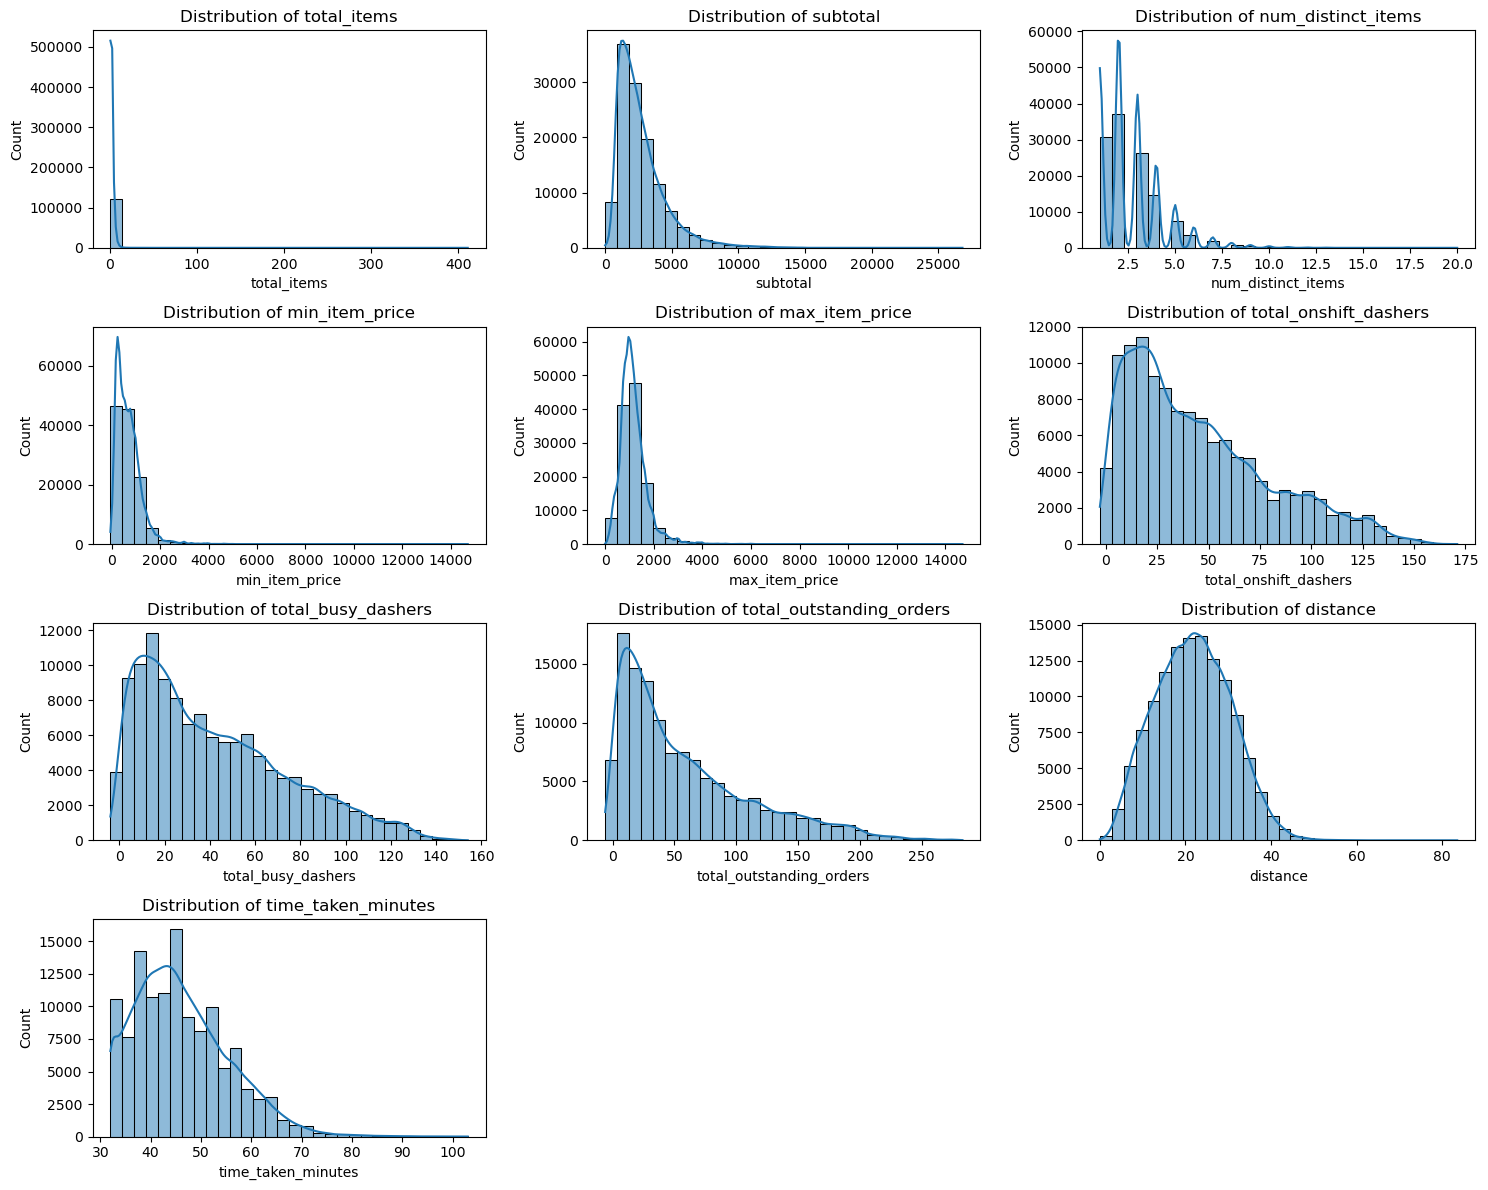

In [283]:
# Plot distributions for all numerical columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  
    sns.histplot(df_train[col], kde=True, bins=30)  # Histogram 
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

In [256]:
df_train_num

total_items  subtotal  num_distinct_items  min_item_price  \
94746             2      1790                   2             795   
173338            1       845                   1             795   
37592             1      1900                   1            1200   
42763             6       463                   3               0   
27506             3      3500                   3             600   
...             ...       ...                 ...             ...   
82270             1       895                   1             895   
65615             7      3894                   6             100   
77655            17       448                   3               0   
56088             2      3000                   2             400   
38408             2      3750                   2            1700   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
94746              995                     10                   9   
173338             795                    134                  76   
37592             1200                     21                  21   
42763              299                     98                  87   
27506             1200                      7                  13   
...                ...                    ...                 ...   
82270              895                      4                   2   
65615             1221                     64                  60   
77655              289                     39                  43   
56088             1500                     44                  43   
38408             2050                     42                  59   

        total_outstanding_orders  distance  time_taken_minutes  
94746                         15     18.04                41.0  
173338                       136     24.28                41.0  
37592                         28     28.24                44.0  
42763                        129     13.88                40.0  
27506                         17      8.00                44.0  
...                          ...       ...                 ...  
82270                          1     16.16                37.0  
65615                         64     22.64                36.0  
77655                         50     20.64                36.0  
56088                         63     21.64                44.0  
38408                         36     27.24                42.0  

[123043 rows x 10 columns]

In [ ]:
##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

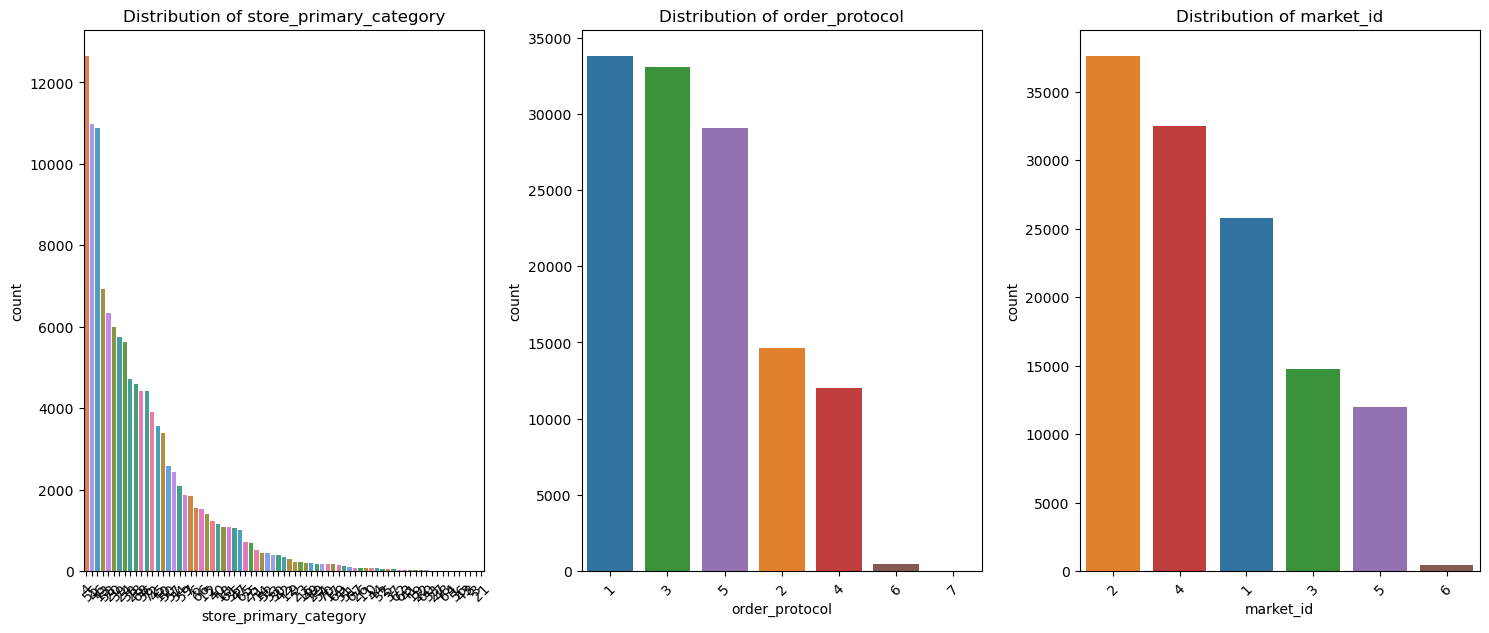

In [176]:
# Distribution of categorical columns

plt.figure(figsize=(15, 12))

# Plot count plots for each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 3 + 1, 3, i + 1)  # Arrange subplots
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, hue=col, legend=False)
    plt.xticks(rotation=45)  # Rotate x labels for readability
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

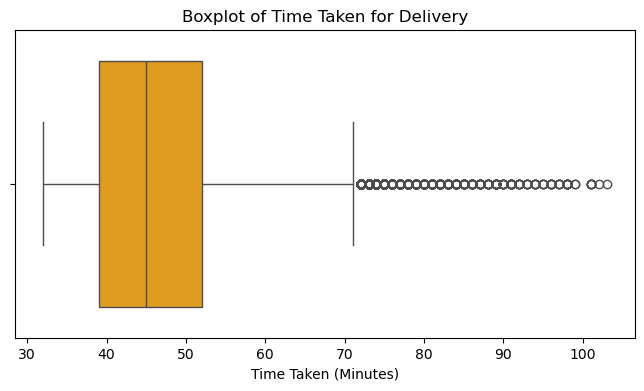

In [177]:
# Distribution of time_taken

plt.figure(figsize=(8, 4))
sns.boxplot(x=df_train['time_taken_minutes'], color="orange")
plt.xlabel("Time Taken (Minutes)")
plt.title("Boxplot of Time Taken for Delivery")
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

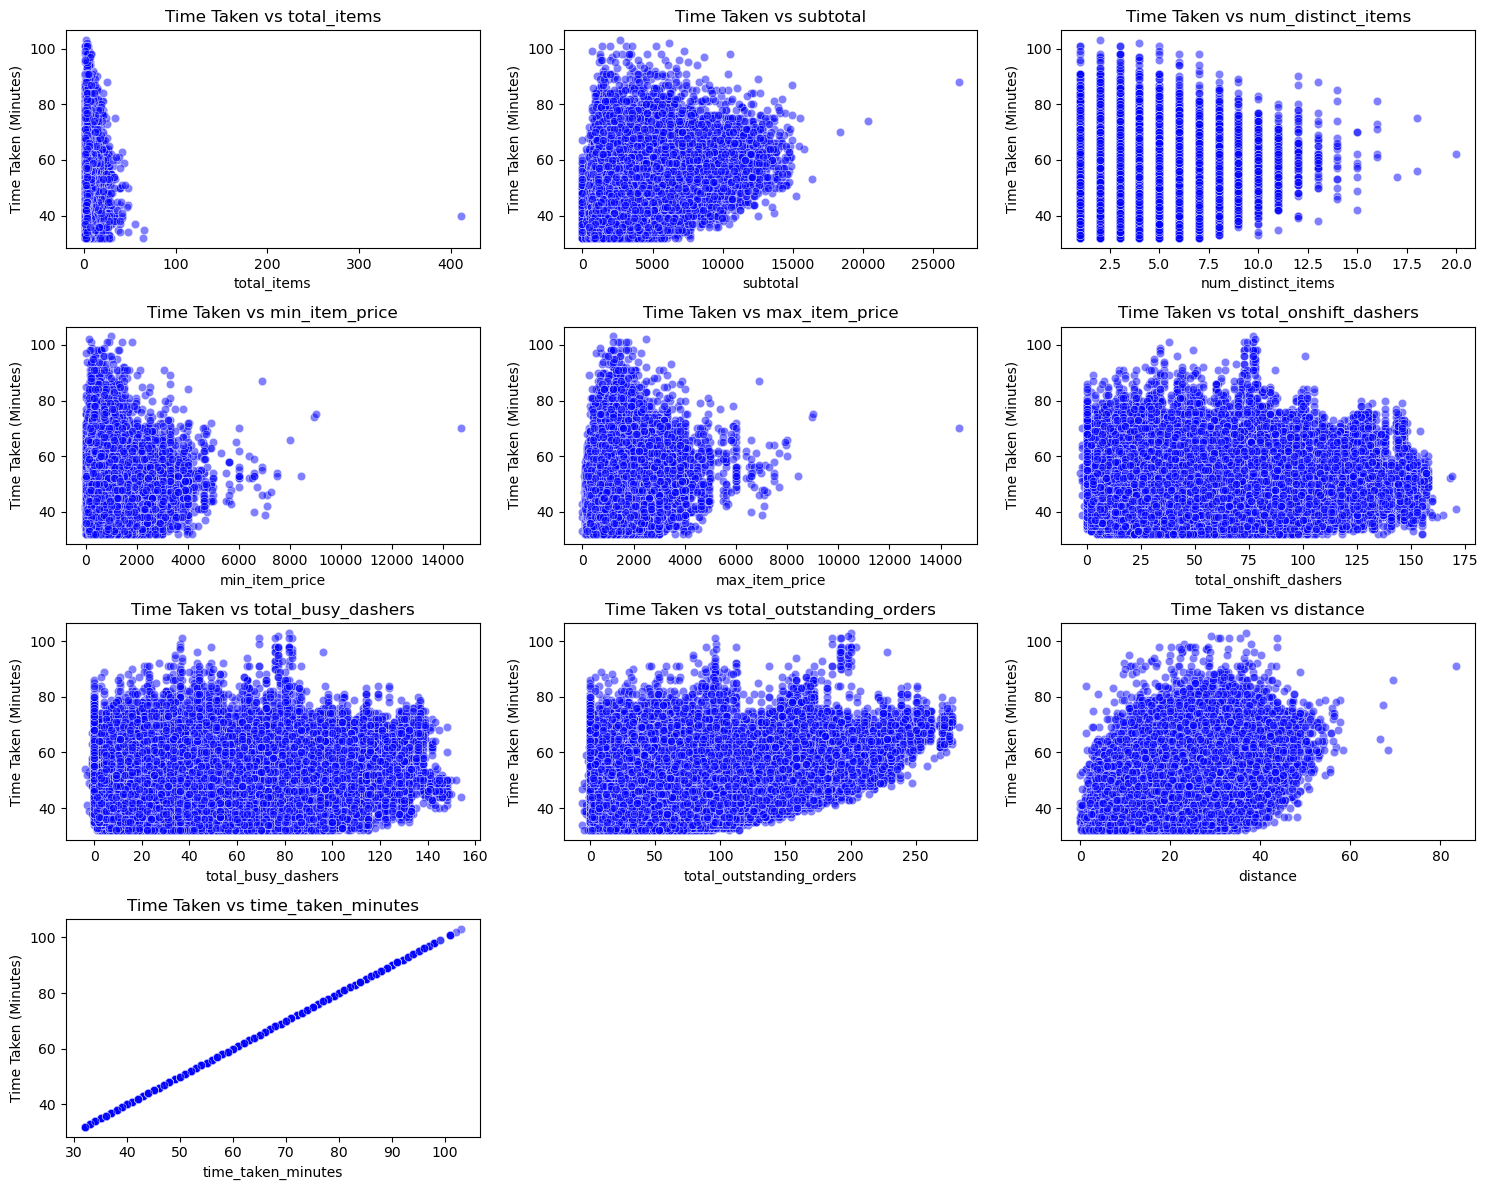

In [284]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.figure(figsize=(15, 12))

# Adjusting to a 4-row x 3-column layout
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  # Use 4 rows and 3 columns
    sns.scatterplot(x=df_train[col], y=df_train['time_taken_minutes'], alpha=0.5, color="blue")
    plt.xlabel(col)
    plt.ylabel("Time Taken (Minutes)")
    plt.title(f"Time Taken vs {col}")

plt.tight_layout()
plt.show()

C:\Users\sobcs\AppData\Local\Temp\ipykernel_21756\1461305558.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='created_hour', y='time_taken_minutes', palette="viridis")


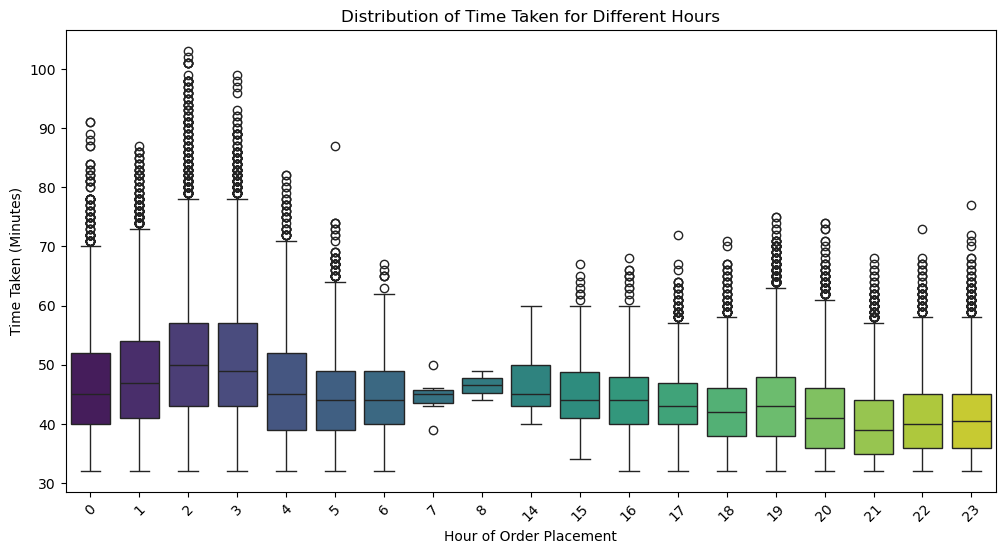

In [179]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_train, x='created_hour', y='time_taken_minutes', palette="viridis")
plt.xlabel("Hour of Order Placement")
plt.ylabel("Time Taken (Minutes)")
plt.title("Distribution of Time Taken for Different Hours")
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

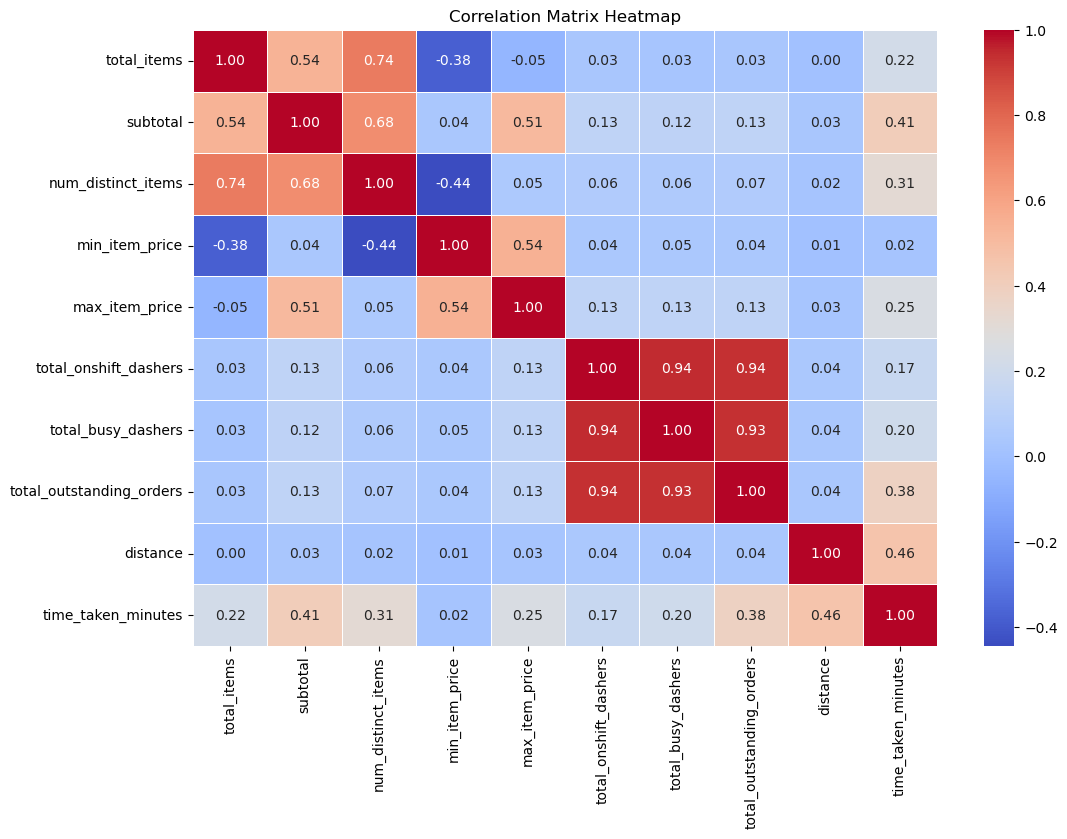

In [180]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(12, 8))
sns.heatmap(df_train_num.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [126]:
##### **3.3.2** <font color = red>[2 marks]</font> <br>
##Drop the column
#s with weak correlations with the target variable
X.columns


Index(['market_id', 'created_at', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'actual_delivery_date',
       'created_delivery_hour', 'created_date', 'created_hour', 'day_of_week',
       'isWeekend'],
      dtype='object')

In [285]:
# Drop 3-5 weakly correlated columns from training dataset
##  min correlated items are 'min_item_price',  'total_onshift_dashers',  'total_busy_dashers', 'total_items' , 'max_item_price'
weakly_correlated_cols = ['min_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_items', 'max_item_price']

# Drop them from the training dataset
df_train = df_train.drop(columns=weakly_correlated_cols)

# Verify the changes
print(df_train.head())

       market_id          created_at store_primary_category order_protocol  \
94746          4 2015-02-09 18:35:00                     24              5   
173338         4 2015-02-07 02:00:00                     72              5   
37592          4 2015-02-15 23:31:00                     55              5   
42763          2 2015-01-31 01:31:00                     28              4   
27506          2 2015-02-07 05:37:00                     72              1   

        subtotal  num_distinct_items  total_outstanding_orders  distance  \
94746       1790                   2                        15     18.04   
173338       845                   1                       136     24.28   
37592       1900                   1                        28     28.24   
42763        463                   3                       129     13.88   
27506       3500                   3                        17      8.00   

       created_date  created_hour actual_delivery_date  created_delivery_h

In [286]:
df_test = df_test.drop(columns=['day_of_week'])
print(df_test.head())

       market_id          created_at store_primary_category order_protocol  \
139667         1 2015-01-23 03:55:00                     45              1   
80077          1 2015-01-24 01:39:00                      4              1   
41872          1 2015-01-29 03:12:00                     46              4   
165269         4 2015-01-24 03:16:00                     24              5   
151215         4 2015-02-07 22:25:00                      6              2   

        total_items  subtotal  num_distinct_items  min_item_price  \
139667            3      1295                   2             150   
80077             2      2950                   1            1225   
41872             1      1395                   1            1395   
165269            2      2967                   2            1097   
151215            3      1250                   2             375   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
139667             995                     59  

In [287]:
#print(df_train.columns)
print(df_test.columns)

Index(['market_id', 'created_at', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'created_date', 'created_hour',
       'actual_delivery_date', 'created_delivery_hour', 'time_taken_minutes',
       'isWeekend'],
      dtype='object')


In [288]:
df_train = df_train.drop(columns=['day_of_week'])
print(df_train.columns)

Index(['market_id', 'created_at', 'store_primary_category', 'order_protocol',
       'subtotal', 'num_distinct_items', 'total_outstanding_orders',
       'distance', 'created_date', 'created_hour', 'actual_delivery_date',
       'created_delivery_hour', 'time_taken_minutes', 'isWeekend'],
      dtype='object')


In [58]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: time_taken_minutes, dtype: float64

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

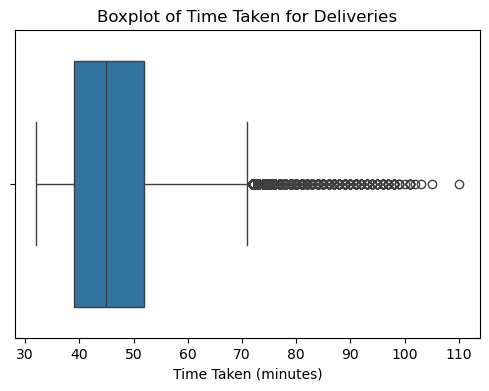

In [129]:
# Boxplot for time_taken
plt.figure(figsize=(6, 4))
sns.boxplot(x=y)

# Add labels and title
plt.xlabel("Time Taken (minutes)")
plt.title("Boxplot of Time Taken for Deliveries")

# Show the plot
plt.show()


In [48]:
X.head()

market_id          created_at store_primary_category order_protocol  \
0         1 2015-02-06 22:24:00                      4              1   
1         2 2015-02-10 21:49:00                     46              2   
2         2 2015-02-16 00:11:00                     36              3   
3         1 2015-02-12 03:36:00                     38              1   
4         1 2015-01-27 02:12:00                     38              1   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            4      4771                   3             820            1604   
3            1      1525                   1            1525            1525   
4            2      3620                   2            1425            2195   

   total_onshift_dashers  ...  created_delivery_hour  created_date  \
0                     33  ...                     23    2015-02-06   
1                      1  ...                     22    2015-02-10   
2                      8  ...                      1    2015-02-16   
3                      5  ...                      4    2015-02-12   
4                      5  ...                      2    2015-01-27   

   created_hour isWeekend  day_of_week_Monday day_of_week_Saturday  \
0            22         0               False                False   
1            21         0               False                False   
2             0         0                True                False   
3             3         0               False                False   
4             2         0               False                False   

   day_of_week_Sunday  day_of_week_Thursday  day_of_week_Tuesday  \
0               False                 False                False   
1               False                 False                 True   
2               False                 False                False   
3               False                  True                False   
4               False                 False                 True   

   day_of_week_Wednesday  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False  

[5 rows x 24 columns]

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [91]:
# Handle outliers
Q1 = X.quantile(0.25)


AssertionError: 

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [185]:
# Plot distributions for all numerical columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  
    sns.histplot(df_train[col], kde=True, bins=30)  # Histogram 
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

KeyError: 'total_items'

##### **4.1.2**
Check the distribution of categorical features

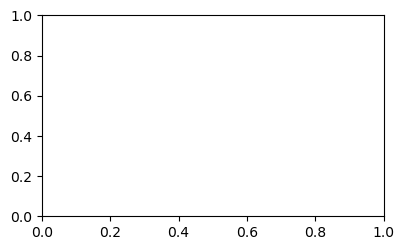

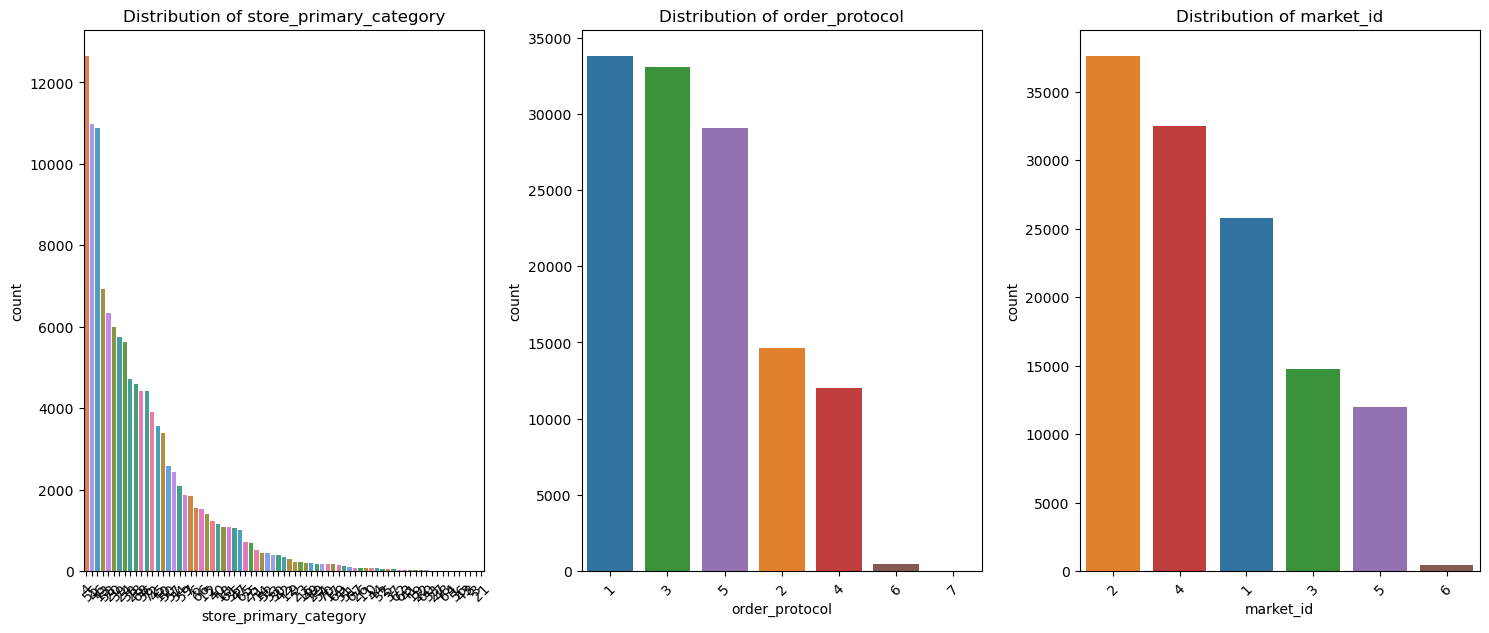

In [143]:
# Distribution of categorical columns
plt.figure(figsize=(15, 12))

# Plot count plots for each categorical column
for i, col in enumerate(categorical_cols):
    plt.subplot(len(categorical_cols) // 3 + 1, 3, i + 1)  # Arrange subplots
    sns.countplot(data=df_train, x=col, order=df_train[col].value_counts().index, hue=col, legend=False)
    plt.xticks(rotation=45)  # Rotate x labels for readability
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [ ]:
# Import libraries



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [289]:
# Apply scaling to the numerical columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [187]:
X.columns

Index(['market_id', 'created_at', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'actual_delivery_date',
       'created_delivery_hour', 'created_date', 'created_hour', 'isWeekend',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday'],
      dtype='object')

In [ ]:
# df_train_num = df_train[numerical_cols]
# df_test_num = df_test[numerical_cols]
# df_train_cat = df_train[categorical_cols]
# df_test_cat = df_test[categorical_cols]

In [240]:
df_train_num.head()
df_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123043 entries, 94746 to 38408
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   total_items               123043 non-null  int64  
 1   subtotal                  123043 non-null  int64  
 2   num_distinct_items        123043 non-null  int64  
 3   min_item_price            123043 non-null  int64  
 4   max_item_price            123043 non-null  int64  
 5   total_onshift_dashers     123043 non-null  int64  
 6   total_busy_dashers        123043 non-null  int64  
 7   total_outstanding_orders  123043 non-null  int64  
 8   distance                  123043 non-null  float64
 9   time_taken_minutes        123043 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 10.3 MB


In [290]:
num_vars = ['subtotal', 'total_outstanding_orders', 'distance', 'num_distinct_items']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train_scaled.head()

total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0     0.002439  0.066791            0.052632        0.057416        0.067687   
1     0.000000  0.031530            0.000000        0.057416        0.054082   
2     0.000000  0.070896            0.000000        0.084870        0.081633   
3     0.012195  0.017276            0.105263        0.003525        0.020340   
4     0.004878  0.130597            0.105263        0.044197        0.081633   

   total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0               0.074713            0.082278                  0.072664   
1               0.787356            0.506329                  0.491349   
2               0.137931            0.158228                  0.117647   
3               0.580460            0.575949                  0.467128   
4               0.057471            0.107595                  0.079585   

   distance  time_taken_minutes  
0  0.215996            0.126761  
1  0.290709            0.126761  
2  0.338123            0.169014  
3  0.166188            0.112676  
4  0.095785            0.169014

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [291]:
y_train = df_train.pop('time_taken_minutes')
X_train = df_train
X_train

market_id          created_at store_primary_category order_protocol  \
94746          4 2015-02-09 18:35:00                     24              5   
173338         4 2015-02-07 02:00:00                     72              5   
37592          4 2015-02-15 23:31:00                     55              5   
42763          2 2015-01-31 01:31:00                     28              4   
27506          2 2015-02-07 05:37:00                     72              1   
...          ...                 ...                    ...            ...   
82270          3 2015-02-12 20:46:00                     15              1   
65615          2 2015-02-15 23:19:00                     58              5   
77655          2 2015-02-03 05:07:00                      4              5   
56088          2 2015-02-06 19:15:00                     55              3   
38408          4 2015-01-27 00:38:00                      7              1   

        subtotal  num_distinct_items  total_outstanding_orders  distance  \
94746   0.066791            0.052632                  0.072664  0.215996   
173338  0.031530            0.000000                  0.491349  0.290709   
37592   0.070896            0.000000                  0.117647  0.338123   
42763   0.017276            0.105263                  0.467128  0.166188   
27506   0.130597            0.105263                  0.079585  0.095785   
...          ...                 ...                       ...       ...   
82270   0.033396            0.000000                  0.024221  0.193487   
65615   0.145299            0.263158                  0.242215  0.271073   
77655   0.016716            0.105263                  0.193772  0.247126   
56088   0.111940            0.052632                  0.238754  0.259100   
38408   0.139925            0.052632                  0.145329  0.326149   

       created_date  created_hour actual_delivery_date  created_delivery_hour  \
94746    2015-02-09            18           2015-02-09                     19   
173338   2015-02-07             2           2015-02-07                      2   
37592    2015-02-15            23           2015-02-16                      0   
42763    2015-01-31             1           2015-01-31                      2   
27506    2015-02-07             5           2015-02-07                      6   
...             ...           ...                  ...                    ...   
82270    2015-02-12            20           2015-02-12                     21   
65615    2015-02-15            23           2015-02-15                     23   
77655    2015-02-03             5           2015-02-03                      5   
56088    2015-02-06            19           2015-02-06                     19   
38408    2015-01-27             0           2015-01-27                      1   

        isWeekend  
94746           0  
173338          1  
37592           1  
42763           1  
27506           1  
...           ...  
82270           0  
65615           1  
77655           0  
56088           0  
38408           0  

[123043 rows x 13 columns]

In [301]:
import statsmodels.api as sm
# # Create/Initialise the model
X_train_lm = sm.add_constant(X_train['distance'])

# # Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm).fit()

# X_train.head()

In [293]:
lr1.params

const       35.507736
distance    40.879451
dtype: float64

In [302]:
X_train_lm = sm.add_constant(X_train[['distance','num_distinct_items',  'total_outstanding_orders']])

# # Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm).fit()


In [300]:
lr2.params

const                       29.295737
distance                    39.215047
num_distinct_items          30.574119
total_outstanding_orders    17.767879
dtype: float64

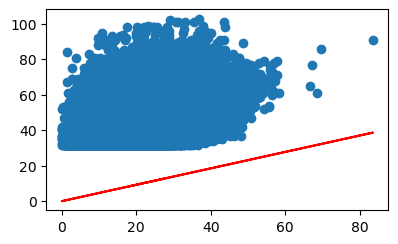

In [204]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.127 + 0.462*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [297]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:     time_taken_minutes   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                 2.677e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:52:02   Log-Likelihood:            -4.2717e+05
No. Observations:              123043   AIC:                         8.544e+05
Df Residuals:                  123040   BIC:                         8.544e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 32.7501      0

In [303]:
X_train_lm = sm.add_constant(X_train[['distance','num_distinct_items', 'total_outstanding_orders' ]])

# # Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm).fit()

In [309]:
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 3.007e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:55:47   Log-Likelihood:            -4.1557e+05
No. Observations:              123043   AIC:                         8.311e+05
Df Residuals:                  123039   BIC:                         8.312e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       29.2957      0.062    475.452      0.000      29.175      29.417
distance                    39.2150      0.193    203.478      0.000      38.837      39.593
num_distinct_items          30.5741      0.237    129.125      0.000      30.110      31.038
total_outstanding_orders    17.7679      0.111    159.846      0.000      17.550      17.986
==============================================================================
Omnibus:                    10845.649   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18301.233
Skew:                           0.646   Prob(JB):                         0.00
Kurtosis:                       4.379   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [310]:
X_train_lm = sm.add_constant(X_train[['distance','num_distinct_items', 'total_outstanding_orders', 'subtotal' ]])

# # Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm).fit()

In [311]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     time_taken_minutes   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 2.759e+04
Date:                Wed, 26 Mar 2025   Prob (F-statistic):               0.00
Time:                        21:56:44   Log-Likelihood:            -4.1001e+05
No. Observations:              123043   AIC:                         8.200e+05
Df Residuals:                  123038   BIC:                         8.201e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       27.4712      0.061    448.287      0.000      27.351      27.591
distance                    38.7720      0.184    210.416      0.000      38.411      39.133
num_distinct_items           7.9469      0.309     25.747      0.000       7.342       8.552
total_outstanding_orders    16.4728      0.107    154.056      0.000      16.263      16.682
subtotal                    41.9515      0.389    107.818      0.000      41.189      42.714
==============================================================================
Omnibus:                    11003.682   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            19677.965
Skew:                           0.634   Prob(JB):                         0.00
Kurtosis:                       4.494   Cond. No.                         25.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ValueError: Data must be 1-dimensional, got ndarray of shape (123043, 1) instead

In [313]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [322]:
# Train the model using the training data
y_train_pred = lr3.predict(X_train_lm)

ValueError: shapes (123043,5) and (4,) not aligned: 5 (dim 1) != 4 (dim 0)

In [323]:
# Make predictions
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

NameError: name 'y_train_pred' is not defined

In [ ]:
# Find results for evaluation metrics



Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [325]:
# Loop through the number of features and test the model

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [328]:
y_test = df_test.pop('time_taken_minutes')
X_test = df_test

KeyError: 'time_taken_minutes'

In [329]:
# Build the final model with selected number of features
X_test_m4 = sm.add_constant(X_test)


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Yes There are categorical variables in the data



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>test_size=0.2 → 20% test, 80% train



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
distance is the more coerrelated param with target variable



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>

distance, 'subtotal, total_outstanding_orders

---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>It is method to make a model based on the concept of equation of straight line y = mx + c where , y - predicted value, c - y intercept, m - slope or gradient




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>For simple linear regression there woulf only one independent variable  and formula is y = mx + c ,
>But multiple linear regression, there would be many number of independent variables , y = m1x1 + m2x2 + m3x3 + ....... mnxn + c



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>Most commonly used cost function is Mean squared error
>MSE = 1/n sum(Yi - Yi^)2
>




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>